In [2]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Paths
DATA_PATH = Path("../data/clean/bank.parquet")

# Load data
df = pd.read_parquet(DATA_PATH)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


You should consider upgrading via the 'C:\Users\user\OneDrive - Fertis India Pvt. Ltd\Desktop\Bank_Marketing\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Shape: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Target counts:
 y
no     39922
yes     5289
Name: count, dtype: int64

Target ratio:
 y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


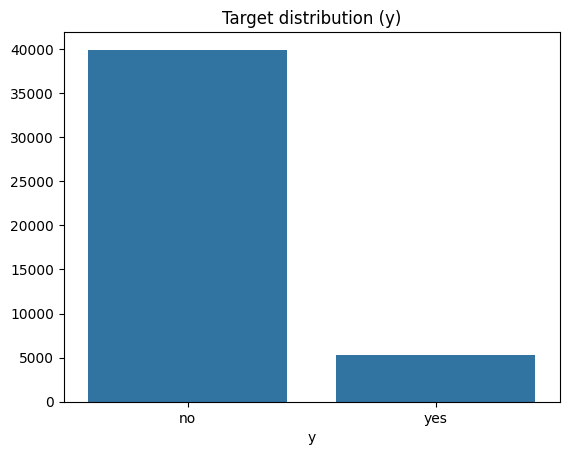

In [3]:
target_counts = df['y'].value_counts(normalize=False)
target_ratio = df['y'].value_counts(normalize=True)

print("Target counts:\n", target_counts)
print("\nTarget ratio:\n", target_ratio)

sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target distribution (y)")
plt.show()


In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int32 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int32 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int32 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int32 
 12  campaign   45211 non-null  int32 
 13  pdays      45211 non-null  int32 
 14  previous   45211 non-null  int32 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int32(7), object(10)
memory usage: 4.7+ MB
None

Missing values:
 age          0
job          0
marital      0
education    0
default      0
b

In [6]:
# Detect numeric-like columns by name (schema known from ETL)
numeric_cols = [
    "age", "balance", "day", "duration", "campaign", "pdays", "previous"
]

print("Numeric columns (forced list):", numeric_cols)

# Cast to numeric just in case parquet loader inferred wrong
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[numeric_cols].describe().T


Numeric columns (forced list): ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", cat_cols)

for c in cat_cols:
    print(f"\n--- {c} ---")
    print(df[c].value_counts(normalize=True).head(10))


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

--- job ---
job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
Name: proportion, dtype: float64

--- marital ---
marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

--- education ---
education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

--- default ---
default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

--- housing ---
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64

--- loan ---
loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

--- contact ---
contact
cellular  

In [1]:
# --- Setup & Load ---
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

DATA_PATH = Path("../data/clean/bank.parquet")
assert DATA_PATH.exists(), f"Missing: {DATA_PATH}"

df = pd.read_parquet(DATA_PATH)

# Standardize column names (idempotent)
def to_snake(s: str) -> str:
    return (
        s.strip()
         .replace(" ", "_")
         .replace("-", "_")
         .replace("/", "_")
         .lower()
    )

df.columns = [to_snake(c) for c in df.columns]

# Identify types
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("Shape:", df.shape)
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols[:10], "..." if len(cat_cols) > 10 else "")
df.head(5)


Shape: (45211, 17)
Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Target counts:
 y
no     39922
yes     5289

Target ratios:
 y
no     0.883
yes    0.117

Minority class ratio: 0.1170
Imbalance flag: SEVERE


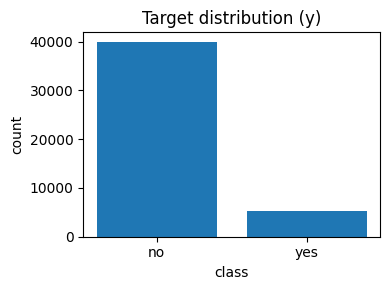

In [2]:
# --- Target distribution & imbalance flag ---
import matplotlib.pyplot as plt

target = "y"
counts = df[target].value_counts(dropna=False).sort_index()
ratios = df[target].value_counts(normalize=True, dropna=False).sort_index()

print("Target counts:\n", counts.to_string())
print("\nTarget ratios:\n", ratios.round(4).to_string())

minority_ratio = ratios.min()
print(f"\nMinority class ratio: {minority_ratio:.4f}")
print("Imbalance flag:", "SEVERE" if minority_ratio < 0.20 else "MILD")

# Bar chart
plt.figure(figsize=(4,3))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Target distribution (y)")
plt.xlabel("class")
plt.ylabel("count")
plt.tight_layout()
plt.show()


Missing counts:
 Series([], dtype: int64)


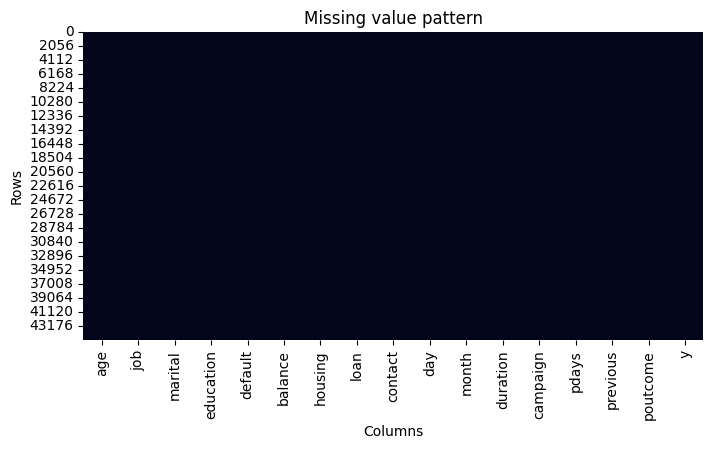

In [3]:
# --- Missing values pattern ---
import seaborn as sns

missing_counts = df.isnull().sum()
print("Missing counts:\n", missing_counts[missing_counts > 0])

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing value pattern")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


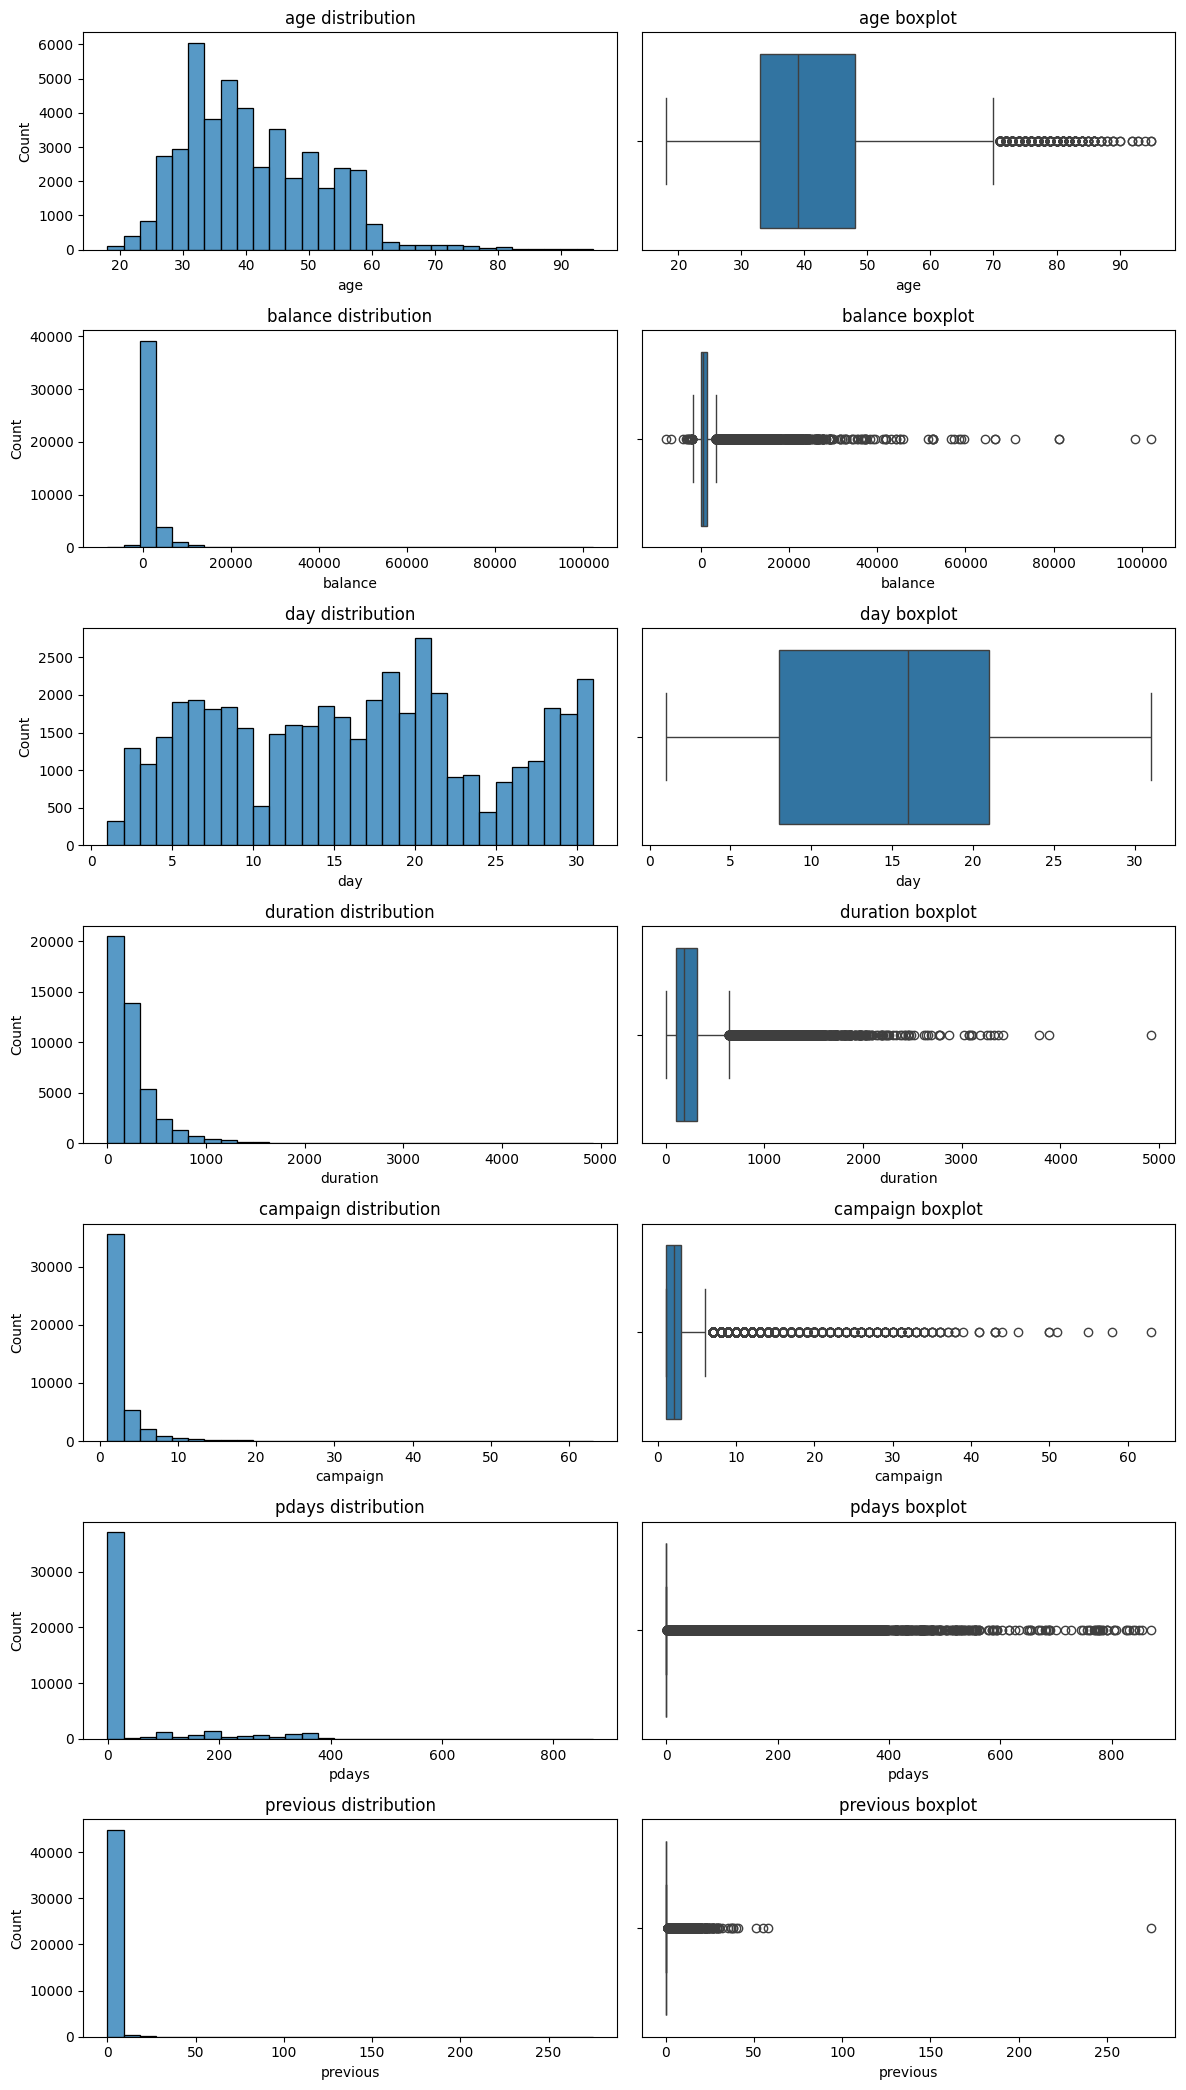

In [4]:
# --- Univariate analysis: numeric histograms + boxplots ---
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 3*len(num_cols)))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, ax=axes[i,0], kde=False)
    axes[i,0].set_title(f"{col} distribution")

    sns.boxplot(x=df[col], ax=axes[i,1], orient="h")
    axes[i,1].set_title(f"{col} boxplot")

plt.tight_layout()
plt.show()


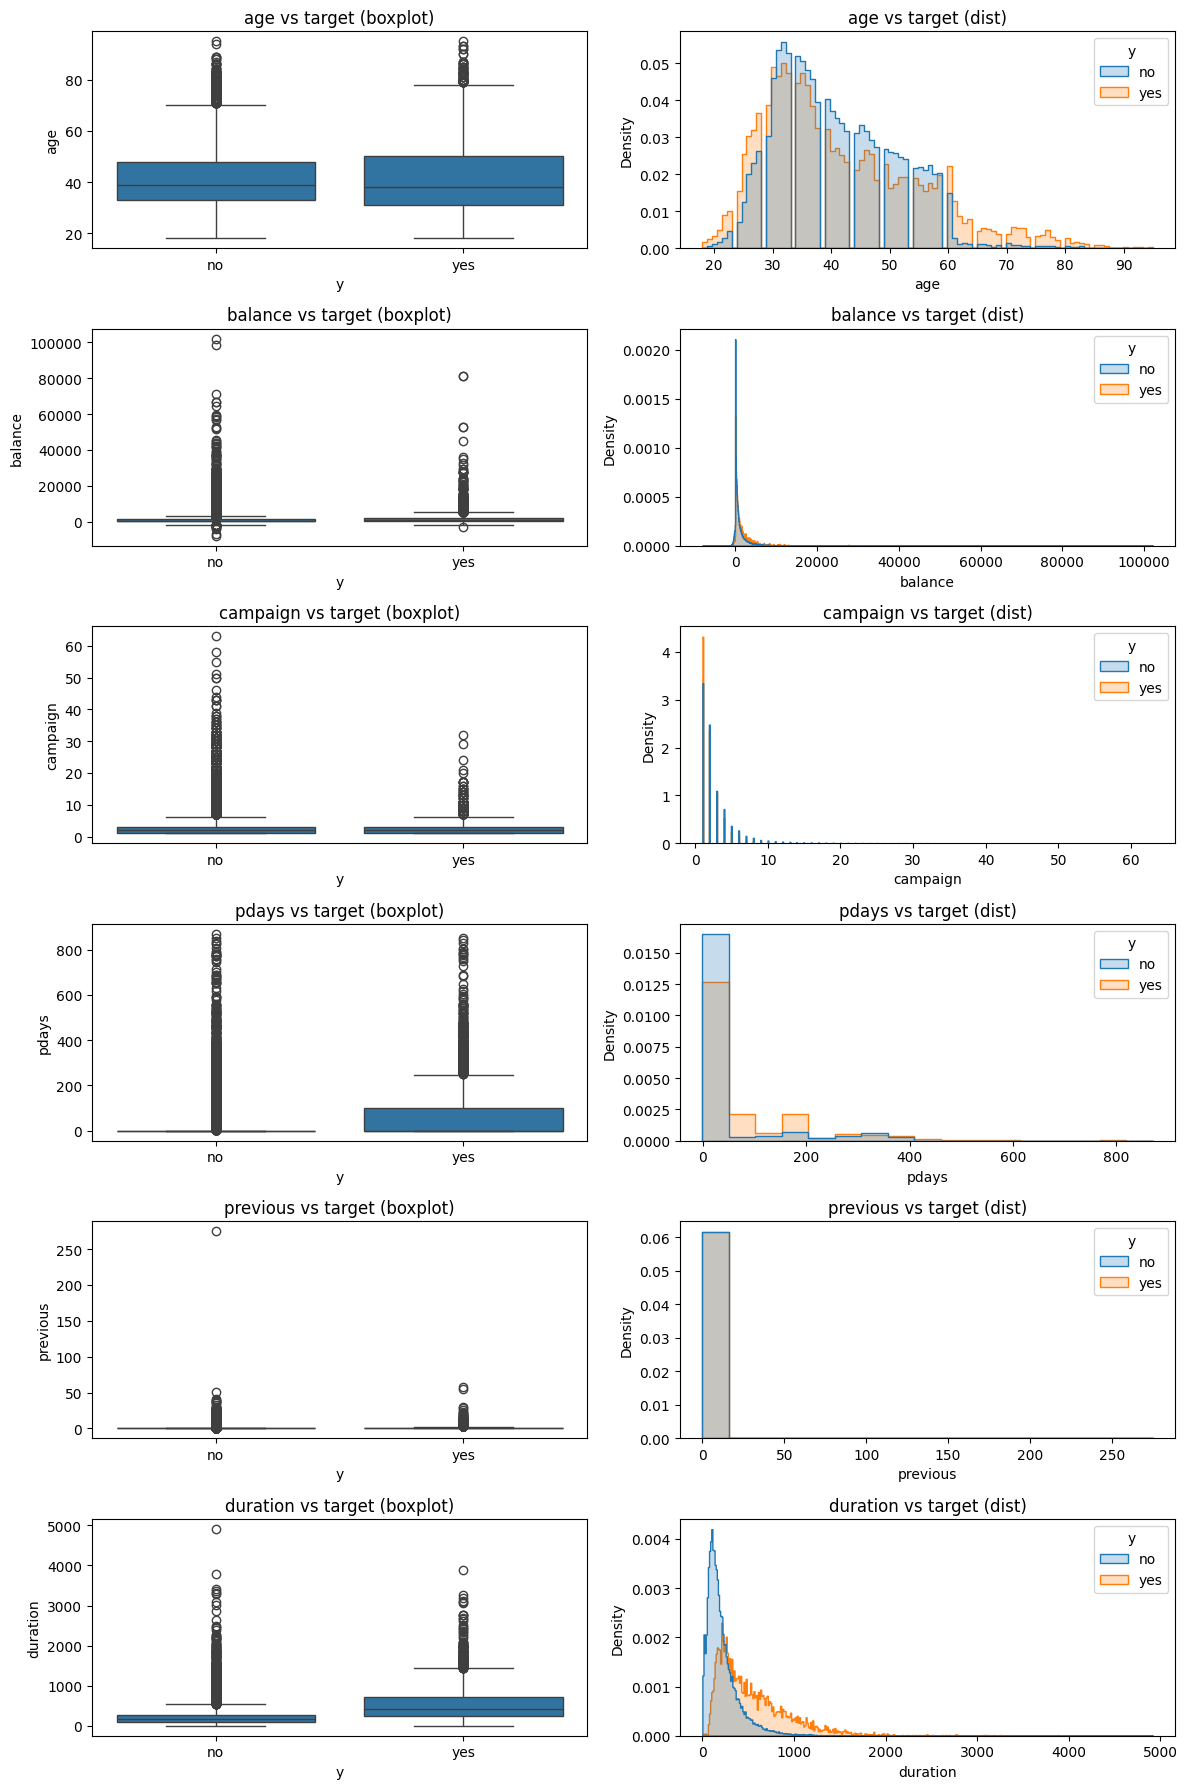

In [5]:
# --- Bivariate analysis: numeric vs target ---
num_cols = ['age', 'balance', 'campaign', 'pdays', 'previous', 'duration']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 3*len(num_cols)))

for i, col in enumerate(num_cols):
    # boxplot
    sns.boxplot(x="y", y=col, data=df, ax=axes[i,0])
    axes[i,0].set_title(f"{col} vs target (boxplot)")

    # histogram/kde
    sns.histplot(data=df, x=col, hue="y", element="step", stat="density", common_norm=False, ax=axes[i,1])
    axes[i,1].set_title(f"{col} vs target (dist)")
    
plt.tight_layout()
plt.show()


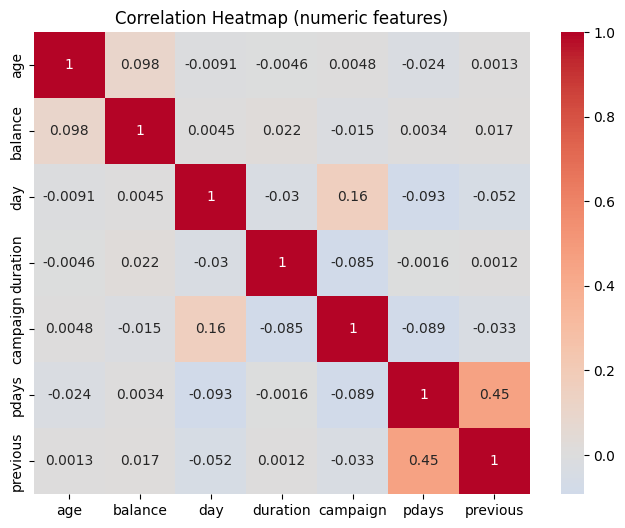

In [6]:
# --- Correlation heatmap: numeric features ---
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric features)")
plt.show()


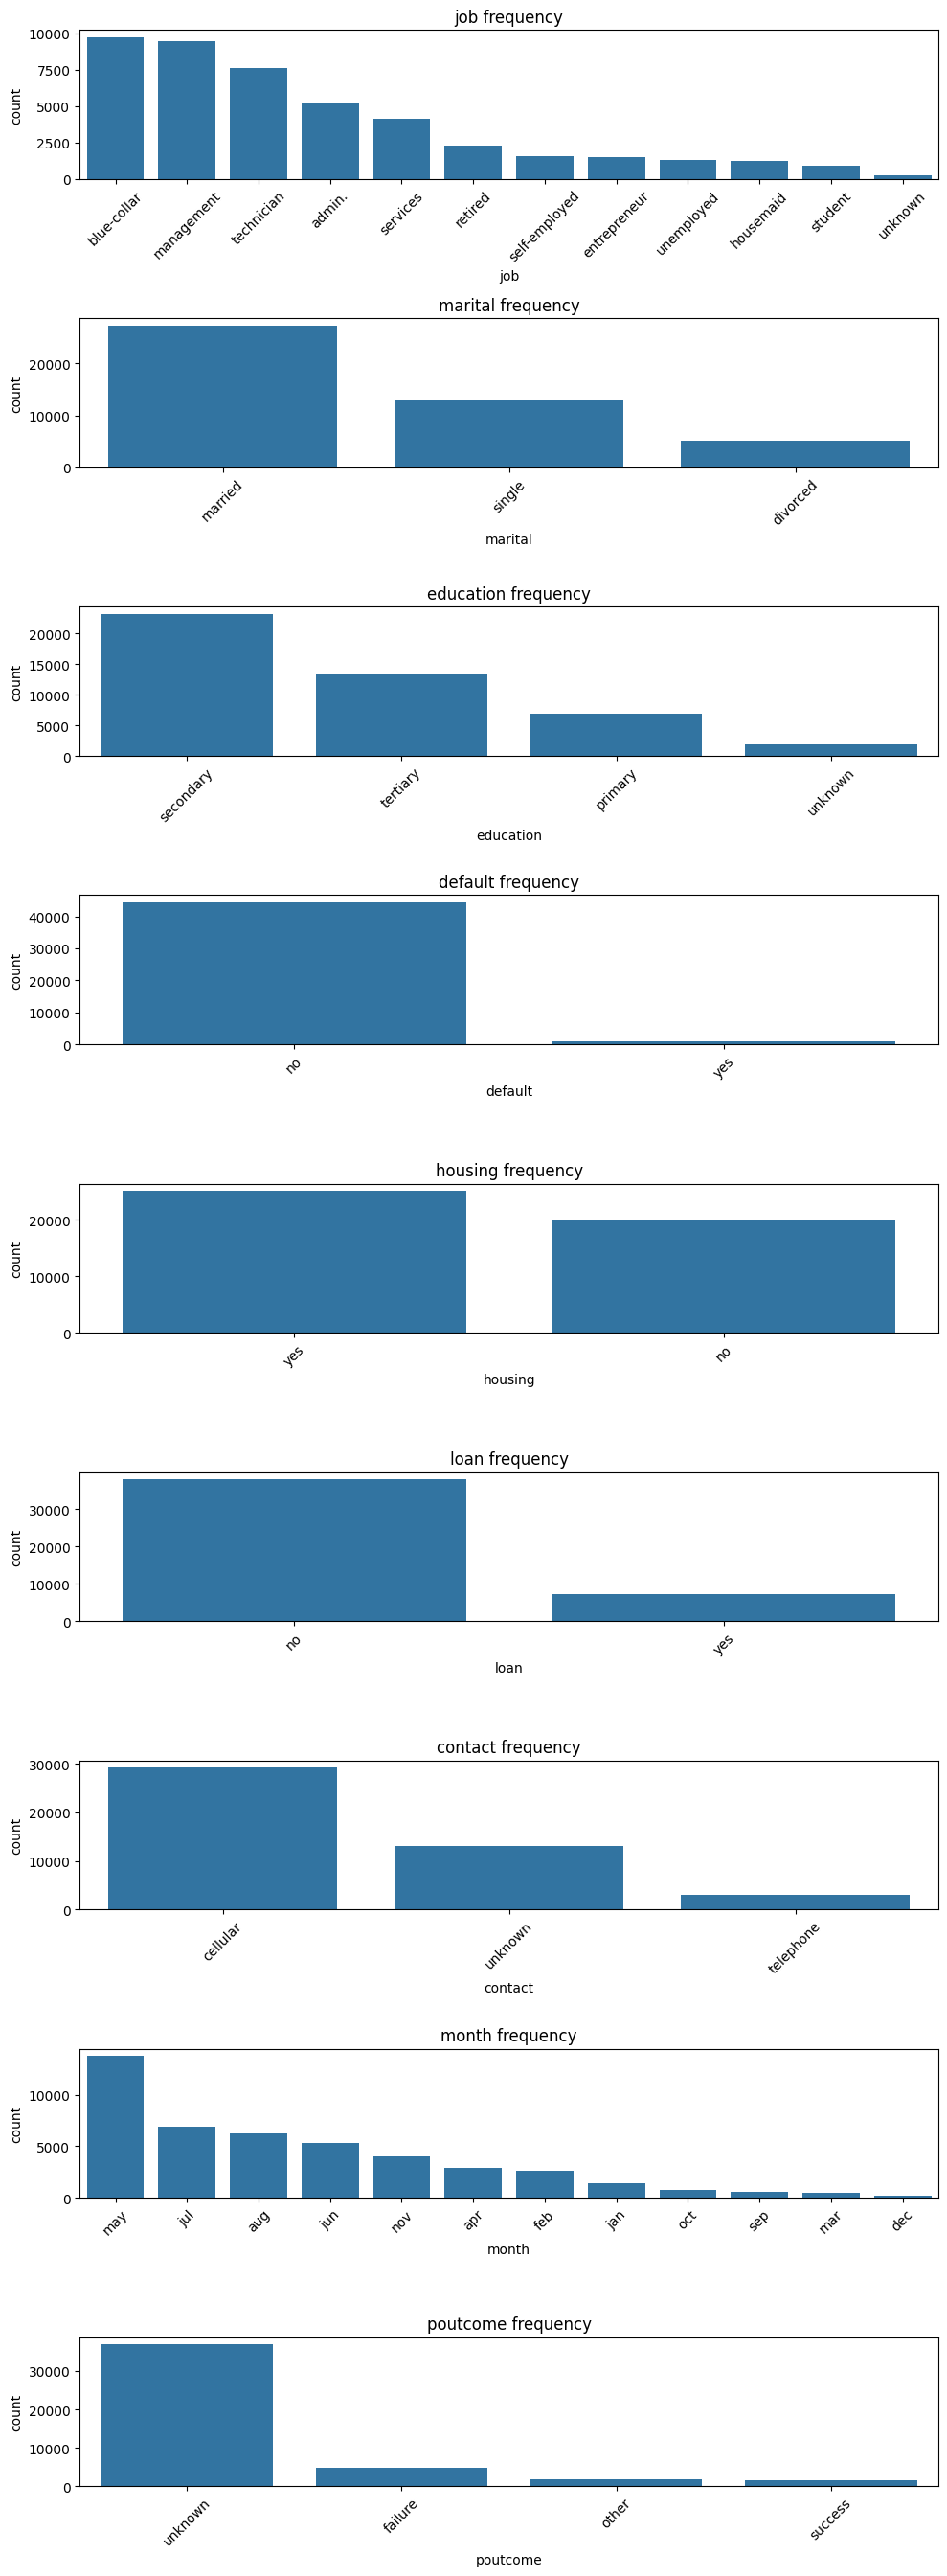

In [7]:
# --- Categorical feature frequencies ---
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 3*len(cat_cols)))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} frequency")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [8]:
# --- Outlier detection with IQR method ---
num_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']

outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = {
        "Q1": Q1, "Q3": Q3, "IQR": IQR,
        "LowerBound": lower, "UpperBound": upper,
        "Outliers": outliers
    }

pd.DataFrame(outlier_summary).T


,Q1,Q3,IQR,LowerBound,UpperBound,Outliers
age,33.0,48.0,15.0,10.5,70.5,487.0
balance,72.0,1428.0,1356.0,-1962.0,3462.0,4729.0
campaign,1.0,3.0,2.0,-2.0,6.0,3064.0
pdays,-1.0,-1.0,0.0,-1.0,-1.0,8257.0
previous,0.0,0.0,0.0,0.0,0.0,8257.0


In [9]:
# --- Train/Test split with stratification ---
from sklearn.model_selection import train_test_split

X = df.drop(columns=["y"])
y = df["y"].map({"no":0, "yes":1})  # convert target to 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class ratio:", y_train.mean().round(4))
print("Test class ratio:", y_test.mean().round(4))


Train size: (36168, 16) Test size: (9043, 16)
Train class ratio: 0.117
Test class ratio: 0.117


In [14]:
# --- Baseline Models ---
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
}

for name, model in models.items():
    model.fit(X_train.select_dtypes(exclude="object"), y_train)  # numeric-only baseline
    y_pred = model.predict(X_test.select_dtypes(exclude="object"))
    y_prob = model.predict_proba(X_test.select_dtypes(exclude="object"))[:,1]
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))



=== Dummy ===
              precision    recall  f1-score   support

           0      0.883     1.000     0.938      7985
           1      0.000     0.000     0.000      1058

    accuracy                          0.883      9043
   macro avg      0.442     0.500     0.469      9043
weighted avg      0.780     0.883     0.828      9043

ROC AUC: 0.5

=== LogReg ===
              precision    recall  f1-score   support

           0      0.952     0.808     0.874      7985
           1      0.322     0.690     0.439      1058

    accuracy                          0.794      9043
   macro avg      0.637     0.749     0.657      9043
weighted avg      0.878     0.794     0.823      9043

ROC AUC: 0.8332

=== DecisionTree ===
              precision    recall  f1-score   support

           0      0.965     0.781     0.863      7985
           1      0.322     0.786     0.457      1058

    accuracy                          0.781      9043
   macro avg      0.644     0.784     0.660   

In [15]:
# --- SMOTE experiment ---
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score,roc_auc_score,classification_report

X_train_num = X_train.select_dtypes(exclude="object")
X_test_num = X_test.select_dtypes(exclude="object")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_num, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_res).value_counts().to_dict())

# Train Random Forest on resampled data
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test_num)
y_prob = rf.predict_proba(X_test_num)[:,1]

print("\n=== RandomForest (SMOTE) ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob).round(4))


Before SMOTE: {0: 31937, 1: 4231}
After SMOTE: {0: 31937, 1: 31937}


You should consider upgrading via the 'C:\Users\user\OneDrive - Fertis India Pvt. Ltd\Desktop\Bank_Marketing\.venv\Scripts\python.exe -m pip install --upgrade pip' command.



=== RandomForest (SMOTE) ===
              precision    recall  f1-score   support

           0      0.950     0.858     0.902      7985
           1      0.382     0.660     0.484      1058

    accuracy                          0.835      9043
   macro avg      0.666     0.759     0.693      9043
weighted avg      0.884     0.835     0.853      9043

ROC AUC: 0.8566
PR AUC: 0.4187


In [16]:
# --- Check duplicates ---
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)


Number of duplicate rows: 0


In [18]:
# --- Handle "unknown" categorical placeholders + dtype parsing ---
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Count "unknown" frequency
for c in cat_cols:
    unk = (df[c] == "unknown").sum()
    if unk > 0:
        print(f"{c}: {unk} unknowns ({unk/len(df):.2%})")

# Convert binary categories to 0/1
binary_map = {"yes": 1, "no": 0}
for c in ["default", "housing", "loan"]:
    df[c] = df[c].map(binary_map)

# Target to 0/1
df["y"] = df["y"].map({"no": 0, "yes": 1})

# Month → categorical order (jan–dec)
month_order = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

print("\nDtypes after parsing:")
print(df.dtypes)


job: 288 unknowns (0.64%)
education: 1857 unknowns (4.11%)
contact: 13020 unknowns (28.80%)
poutcome: 36959 unknowns (81.75%)

Dtypes after parsing:
age             int32
job            object
marital        object
education      object
default         int64
balance         int32
housing         int64
loan            int64
contact        object
day             int32
month        category
duration        int32
campaign        int32
pdays           int32
previous        int32
poutcome       object
y               int64
dtype: object


In [19]:
# --- Feature Engineering ---
import numpy as np

# Bin age into groups
df["age_group"] = pd.cut(df["age"], bins=[17,25,35,45,55,65,100], 
                         labels=["18-25","26-35","36-45","46-55","56-65","66+"])

# Transform pdays: -1 → "never", else bucket
df["pdays_group"] = np.where(df["pdays"] == -1, "never_contacted",
                             pd.cut(df["pdays"], bins=[0,30,90,180,999], 
                                    labels=["<30","30-90","90-180","180+"]))

# Bin previous contacts
df["previous_group"] = pd.cut(df["previous"], bins=[-1,0,2,10,999], 
                              labels=["0","1-2","3-10","10+"])

# Clip extreme balance
df["balance_clipped"] = df["balance"].clip(-2000, 5000)

# Clip campaign (avoid long tail)
df["campaign_clipped"] = df["campaign"].clip(0,10)

print("New engineered columns:", [c for c in df.columns if "group" in c or "clipped" in c])
df[["age","age_group","pdays","pdays_group","previous","previous_group","balance","balance_clipped","campaign","campaign_clipped"]].head(10)


New engineered columns: ['age_group', 'pdays_group', 'previous_group', 'balance_clipped', 'campaign_clipped']


,age,age_group,pdays,pdays_group,previous,previous_group,balance,balance_clipped,campaign,campaign_clipped
0,58,56-65,-1,never_contacted,0,0,2143,2143,1,1
1,44,36-45,-1,never_contacted,0,0,29,29,1,1
2,33,26-35,-1,never_contacted,0,0,2,2,1,1
3,47,46-55,-1,never_contacted,0,0,1506,1506,1,1
4,33,26-35,-1,never_contacted,0,0,1,1,1,1
5,35,26-35,-1,never_contacted,0,0,231,231,1,1
6,28,26-35,-1,never_contacted,0,0,447,447,1,1
7,42,36-45,-1,never_contacted,0,0,2,2,1,1
8,58,56-65,-1,never_contacted,0,0,121,121,1,1
9,43,36-45,-1,never_contacted,0,0,593,593,1,1


In [20]:
# --- Outlier treatment strategy applied ---
outlier_treated = df.copy()

# Age: keep (natural variability)
# Balance: clip already handled in balance_clipped
# Campaign: clip already handled in campaign_clipped
# Pdays: bucketed into categories
# Previous: bucketed into categories

print("Outlier treatment strategy:")
print("- Age: keep (no extreme distortion).")
print("- Balance: use balance_clipped instead of raw.")
print("- Campaign: use campaign_clipped instead of raw.")
print("- Pdays: use categorical bucket instead of raw.")
print("- Previous: use categorical bucket instead of raw.")

print("\nRemaining numeric features after outlier handling:")
print(["age", "balance_clipped", "campaign_clipped"])


Outlier treatment strategy:
- Age: keep (no extreme distortion).
- Balance: use balance_clipped instead of raw.
- Campaign: use campaign_clipped instead of raw.
- Pdays: use categorical bucket instead of raw.
- Previous: use categorical bucket instead of raw.

Remaining numeric features after outlier handling:
['age', 'balance_clipped', 'campaign_clipped']


In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features split
num_features = ["age", "balance_clipped", "campaign_clipped"]
bin_features = ["default", "housing", "loan"]
cat_features = ["job","marital","education","contact","month","poutcome",
                "age_group","pdays_group","previous_group"]

# Preprocessor: scale nums, pass-through binaries, one-hot for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("bin", "passthrough", bin_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

print("Numeric features:", num_features)
print("Binary features:", bin_features)
print("Categorical features:", cat_features)


Numeric features: ['age', 'balance_clipped', 'campaign_clipped']
Binary features: ['default', 'housing', 'loan']
Categorical features: ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'age_group', 'pdays_group', 'previous_group']


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["y"])
y = df["y"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit preprocessor on training data only
preprocessor.fit(X_train)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Target distribution in Train:", y_train.mean().round(3))
print("Target distribution in Test:", y_test.mean().round(3))


Train shape: (36168, 21) Test shape: (9043, 21)
Target distribution in Train: 0.117
Target distribution in Test: 0.117


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Logistic Regression without class weights
logreg_plain = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
logreg_plain.fit(X_train, y_train)
y_pred_plain = logreg_plain.predict(X_test)
y_prob_plain = logreg_plain.predict_proba(X_test)[:,1]

print("=== Logistic Regression (no class weights) ===")
print(classification_report(y_test, y_pred_plain, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob_plain).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob_plain).round(4))

# Logistic Regression with class weights
logreg_bal = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced"))
logreg_bal.fit(X_train, y_train)
y_pred_bal = logreg_bal.predict(X_test)
y_prob_bal = logreg_bal.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression (balanced) ===")
print(classification_report(y_test, y_pred_bal, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob_bal).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob_bal).round(4))


=== Logistic Regression (no class weights) ===
              precision    recall  f1-score   support

           0      0.902     0.987     0.942      7985
           1      0.657     0.188     0.292      1058

    accuracy                          0.894      9043
   macro avg      0.779     0.588     0.617      9043
weighted avg      0.873     0.894     0.866      9043

ROC AUC: 0.7767
PR AUC: 0.4144

=== Logistic Regression (balanced) ===
              precision    recall  f1-score   support

           0      0.942     0.786     0.857      7985
           1      0.283     0.637     0.392      1058

    accuracy                          0.769      9043
   macro avg      0.613     0.712     0.625      9043
weighted avg      0.865     0.769     0.803      9043

ROC AUC: 0.777
PR AUC: 0.4132


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Encode & scale numeric + categorical first
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

print("Encoded train shape:", X_train_enc.shape, "Encoded test shape:", X_test_enc.shape)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_enc, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_res).value_counts().to_dict())

# Train RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test_enc)
y_prob = rf.predict_proba(X_test_enc)[:,1]

print("\n=== RandomForest (SMOTE) ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob).round(4))


Encoded train shape: (36168, 59) Encoded test shape: (9043, 59)
Before SMOTE: {0: 31937, 1: 4231}
After SMOTE: {0: 31937, 1: 31937}

=== RandomForest (SMOTE) ===
              precision    recall  f1-score   support

           0      0.912     0.961     0.936      7985
           1      0.504     0.302     0.377      1058

    accuracy                          0.884      9043
   macro avg      0.708     0.631     0.657      9043
weighted avg      0.864     0.884     0.870      9043

ROC AUC: 0.7609
PR AUC: 0.3672


In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

baseline_models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
}

for name, model in baseline_models.items():
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
    print("PR AUC:", average_precision_score(y_test, y_prob).round(4))



=== Dummy ===
              precision    recall  f1-score   support

           0      0.883     1.000     0.938      7985
           1      0.000     0.000     0.000      1058

    accuracy                          0.883      9043
   macro avg      0.442     0.500     0.469      9043
weighted avg      0.780     0.883     0.828      9043

ROC AUC: 0.5
PR AUC: 0.117

=== LogisticRegression ===
              precision    recall  f1-score   support

           0      0.942     0.786     0.857      7985
           1      0.283     0.637     0.392      1058

    accuracy                          0.769      9043
   macro avg      0.613     0.712     0.625      9043
weighted avg      0.865     0.769     0.803      9043

ROC AUC: 0.777
PR AUC: 0.4132

=== DecisionTree ===
              precision    recall  f1-score   support

           0      0.934     0.827     0.877      7985
           1      0.299     0.557     0.389      1058

    accuracy                          0.796      9043
   mac

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=300, max_depth=None, class_weight="balanced", random_state=42, n_jobs=-1)
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("=== RandomForest ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob).round(4))


=== RandomForest ===
              precision    recall  f1-score   support

           0      0.904     0.981     0.941      7985
           1      0.590     0.211     0.311      1058

    accuracy                          0.891      9043
   macro avg      0.747     0.596     0.626      9043
weighted avg      0.867     0.891     0.867      9043

ROC AUC: 0.7684
PR AUC: 0.3974


In [28]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = make_pipeline(
    preprocessor,
    XGBClassifier(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # imbalance handling
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    )
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print("=== XGBoost ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob).round(4))


You should consider upgrading via the 'C:\Users\user\OneDrive - Fertis India Pvt. Ltd\Desktop\Bank_Marketing\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


=== XGBoost ===
              precision    recall  f1-score   support

           0      0.941     0.840     0.888      7985
           1      0.333     0.602     0.429      1058

    accuracy                          0.812      9043
   macro avg      0.637     0.721     0.658      9043
weighted avg      0.870     0.812     0.834      9043

ROC AUC: 0.7806
PR AUC: 0.4243


In [30]:
!pip install lightgbm
from lightgbm import LGBMClassifier

lgb = make_pipeline(
    preprocessor,
    LGBMClassifier(
        n_estimators=500,
        max_depth=-1,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
)

lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
y_prob = lgb.predict_proba(X_test)[:,1]

print("=== LightGBM ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob).round(4))


[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


You should consider upgrading via the 'C:\Users\user\OneDrive - Fertis India Pvt. Ltd\Desktop\Bank_Marketing\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


=== LightGBM ===
              precision    recall  f1-score   support

           0      0.940     0.852     0.894      7985
           1      0.346     0.592     0.437      1058

    accuracy                          0.822      9043
   macro avg      0.643     0.722     0.666      9043
weighted avg      0.871     0.822     0.841      9043

ROC AUC: 0.7794
PR AUC: 0.4318


In [31]:
!pip install catboost
from catboost import CatBoostClassifier

# Categorical feature indices
cat_features_idx = [X.columns.get_loc(c) for c in 
                    ["job","marital","education","contact","month","poutcome",
                     "age_group","pdays_group","previous_group"]]

cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[1, (y_train.value_counts()[0] / y_train.value_counts()[1])],
    random_seed=42,
    verbose=0
)

cat.fit(X_train, y_train, cat_features=cat_features_idx, eval_set=(X_test, y_test), verbose=100)

y_pred = cat.predict(X_test)
y_prob = cat.predict_proba(X_test)[:,1]

print("=== CatBoost ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(4))
print("PR AUC:", average_precision_score(y_test, y_prob).round(4))



You should consider upgrading via the 'C:\Users\user\OneDrive - Fertis India Pvt. Ltd\Desktop\Bank_Marketing\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


0:	test: 0.8624128	best: 0.8624128 (0)	total: 221ms	remaining: 1m 50s
100:	test: 0.9254736	best: 0.9255021 (99)	total: 6.72s	remaining: 26.6s
200:	test: 0.9303905	best: 0.9303905 (200)	total: 12.8s	remaining: 19s
300:	test: 0.9331684	best: 0.9331791 (299)	total: 19s	remaining: 12.5s
400:	test: 0.9339862	best: 0.9339862 (400)	total: 25.4s	remaining: 6.28s
499:	test: 0.9343274	best: 0.9343274 (499)	total: 32s	remaining: 0us

bestTest = 0.93432736
bestIteration = 499

=== CatBoost ===
              precision    recall  f1-score   support

           0      0.981     0.855     0.913      7985
           1      0.443     0.873     0.588      1058

    accuracy                          0.857      9043
   macro avg      0.712     0.864     0.751      9043
weighted avg      0.918     0.857     0.875      9043

ROC AUC: 0.9343
PR AUC: 0.6354


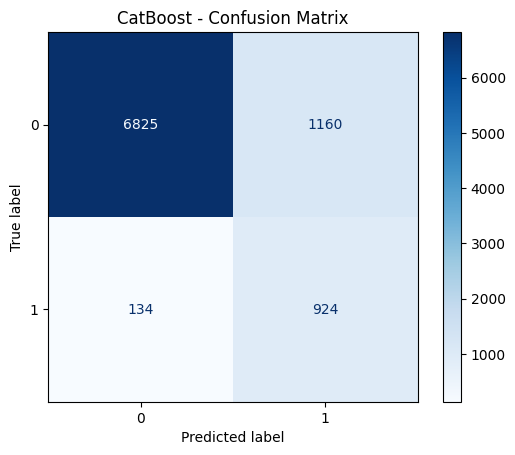

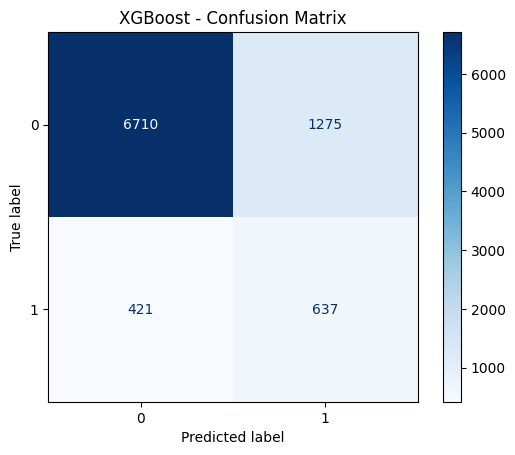

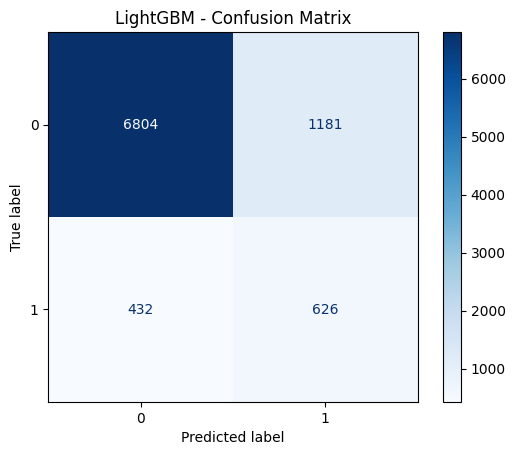

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models_eval = {
    "CatBoost": cat,
    "XGBoost": xgb,
    "LightGBM": lgb
}

for name, model in models_eval.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap="Blues", values_format="d")
    disp.ax_.set_title(f"{name} - Confusion Matrix")
    plt.show()


In [35]:
from catboost import CatBoostClassifier, Pool, cv
import numpy as np
import pandas as pd

# categorical columns by name → indices in raw X (no sklearn preprocessing)
cat_feature_names = ["job","marital","education","contact","month","poutcome",
                     "age_group","pdays_group","previous_group"]
cat_features_idx = [X.columns.get_loc(c) for c in cat_feature_names]

params = {
    "iterations": 500,
    "depth": 6,
    "learning_rate": 0.05,
    "loss_function": "Logloss",
    "eval_metric": "AUC",         # primary metric
    "custom_metric": ["PRAUC"],   # extra metric(s)
    "class_weights": [1.0, (y.value_counts()[0] / y.value_counts()[1])],
    "random_seed": 42,
    "verbose": False,
    "allow_writing_files": False,
}

pool = Pool(X, y, cat_features=cat_features_idx)

cv_results = cv(
    pool=pool,
    params=params,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    stratified=True,
    verbose=False
)

print("Last 5 AUC means:")
print(cv_results["test-AUC-mean"].tail(), "\n")
print("Last 5 PR AUC means:")
print(cv_results["test-PRAUC-mean"].tail(), "\n")

print("Final CV AUC mean ± std:",
      round(float(cv_results["test-AUC-mean"].iloc[-1]), 4), "±",
      round(float(cv_results["test-AUC-std"].iloc[-1]), 4))
print("Final CV PR AUC mean ± std:",
      round(float(cv_results["test-PRAUC-mean"].iloc[-1]), 4), "±",
      round(float(cv_results["test-PRAUC-std"].iloc[-1]), 4))


Training on fold [0/5]

bestTest = 0.9428449846
bestIteration = 475

Training on fold [1/5]

bestTest = 0.9333430002
bestIteration = 424

Training on fold [2/5]

bestTest = 0.9382434529
bestIteration = 499

Training on fold [3/5]

bestTest = 0.9396071207
bestIteration = 497

Training on fold [4/5]

bestTest = 0.9385843589
bestIteration = 476

Last 5 AUC means:
495    0.938448
496    0.938456
497    0.938456
498    0.938459
499    0.938465
Name: test-AUC-mean, dtype: float64 

Last 5 PR AUC means:
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: test-PRAUC-mean, dtype: float64 

Final CV AUC mean ± std: 0.9385 ± 0.0035
Final CV PR AUC mean ± std: nan ± nan


In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores, pr_scores = [], []

for tr_idx, te_idx in skf.split(X, y):
    X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

    cat_idx = [X_tr.columns.get_loc(c) for c in cat_feature_names]

    model = CatBoostClassifier(
        iterations=500, depth=6, learning_rate=0.05,
        loss_function="Logloss", eval_metric="AUC",
        class_weights=[1.0, (y_tr.value_counts()[0] / y_tr.value_counts()[1])],
        random_seed=42, verbose=0
    )
    model.fit(X_tr, y_tr, cat_features=cat_idx)
    proba = model.predict_proba(X_te)[:,1]
    auc_scores.append(roc_auc_score(y_te, proba))
    pr_scores.append(average_precision_score(y_te, proba))

print("CV AUC scores:", np.round(auc_scores, 4), " | mean:", round(np.mean(auc_scores), 4))
print("CV PR AUC scores:", np.round(pr_scores, 4), " | mean:", round(np.mean(pr_scores), 4))


CV AUC scores: [0.9418 0.9405 0.9356 0.9404 0.9321]  | mean: 0.9381
CV PR AUC scores: [0.6467 0.638  0.6288 0.6636 0.6212]  | mean: 0.6397


In [ ]:
import numpy as np
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score
from catboost import CatBoostClassifier

rng = np.random.default_rng(42)

cat_feature_names = ["job","marital","education","contact","month","poutcome",
                     "age_group","pdays_group","previous_group"]
cat_idx = [X.columns.get_loc(c) for c in cat_feature_names]

search_space = {
    "depth":        [4, 5, 6, 7, 8],
    "learning_rate":[0.03, 0.05, 0.08],
    "l2_leaf_reg":  [1, 3, 5, 7, 10],
    "bagging_temperature":[0.0, 0.5, 1.0],
    "iterations":   [400, 500, 700],
    "border_count": [128, 254],
}
# sample ~20 random configs
keys = list(search_space.keys())
grid_all = list(product(*[search_space[k] for k in keys]))
idx = rng.choice(len(grid_all), size=min(20, len(grid_all)), replace=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for i, gi in enumerate(idx, 1):
    params = dict(zip(keys, grid_all[gi]))
    aucs, prs = [], []
    for tr, te in cv.split(X, y):
        Xtr, Xte = X.iloc[tr], X.iloc[te]
        ytr, yte = y.iloc[tr], y.iloc[te]
        model = CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="AUC",
            class_weights=[1.0, (ytr.value_counts()[0]/ytr.value_counts()[1])],
            random_seed=42, verbose=0, allow_writing_files=False,
            **params
        )
        model.fit(Xtr, ytr, cat_features=cat_idx)
        p = model.predict_proba(Xte)[:,1]
        aucs.append(roc_auc_score(yte, p))
        prs.append(average_precision_score(yte, p))
    results.append((params, float(np.mean(prs)), float(np.mean(aucs))))

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
best_params, best_pr, best_auc = results_sorted[0]
print("Best (by PR-AUC):", best_params)
print("CV PR-AUC:", round(best_pr, 4), "| CV ROC AUC:", round(best_auc, 4))


In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import numpy as np

# 1) Tuned CatBoost on raw X
cat_tuned = CatBoostClassifier(
    loss_function="Logloss", eval_metric="AUC",
    class_weights=[1.0, (y_train.value_counts()[0]/y_train.value_counts()[1])],
    random_seed=42, verbose=0, allow_writing_files=False,
    **best_params
)
cat_tuned.fit(X_train, y_train, cat_features=cat_idx)
proba_cat = cat_tuned.predict_proba(X_test)[:,1]

# 2) LGBM on preprocessed
lgb = make_pipeline(
    preprocessor,
    LGBMClassifier(
        n_estimators=500, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        class_weight="balanced", random_state=42, n_jobs=-1
    )
)
lgb.fit(X_train, y_train)
proba_lgb = lgb.predict_proba(X_test)[:,1]

# 3) XGB on preprocessed
xgb = make_pipeline(
    preprocessor,
    XGBClassifier(
        n_estimators=500, max_depth=5, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric="logloss", random_state=42, n_jobs=-1
    )
)
xgb.fit(X_train, y_train)
proba_xgb = xgb.predict_proba(X_test)[:,1]

# Soft-vote (equal weights) & metrics
proba_ens = (proba_cat + proba_lgb + proba_xgb) / 3.0

def report(name, proba):
    y_pred = (proba >= 0.5).astype(int)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("ROC AUC:", round(roc_auc_score(y_test, proba), 4))
    print("PR AUC:", round(average_precision_score(y_test, proba), 4))

report("CatBoost (tuned)", proba_cat)
report("Ensemble (Cat + LGB + XGB)", proba_ens)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

proba = proba_cat  # or proba_ens if ensemble wins
thresholds = np.linspace(0.1, 0.9, 17)
rows = []
for t in thresholds:
    yhat = (proba >= t).astype(int)
    rows.append([t,
                 precision_score(y_test, yhat, zero_division=0),
                 recall_score(y_test, yhat),
                 f1_score(y_test, yhat)])
thr_table = pd.DataFrame(rows, columns=["threshold","precision","recall","f1"]).round(3)
print(thr_table)

best_idx = thr_table["f1"].idxmax()
best_row = thr_table.iloc[best_idx]
print("\nBest F1 row:\n", best_row.to_string())


In [ ]:
import pandas as pd
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": cat_tuned.get_feature_importance(type="FeatureImportance")
}).sort_values("importance", ascending=False)
fi.head(20)
